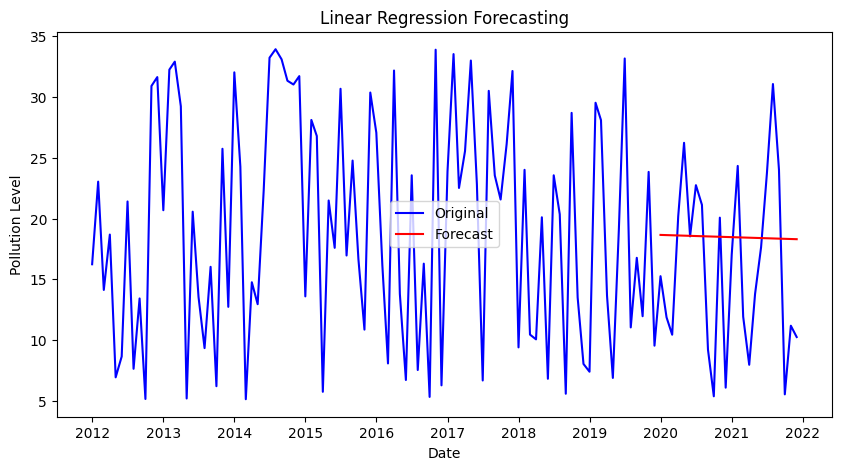

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/us_air_pollution_2012_2021_updated.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(lambda x: x.toordinal())  # Convert Date to numerical

# Features & Target
X = df[['Date_ordinal']]
y = df["PM2.5 (µg/m³)"]  # Update column name if different

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], y, label="Original", color='blue')
plt.plot(df.iloc[len(X_train):]['Date'], y_pred, label="Forecast", color='red')
plt.xlabel("Date")
plt.ylabel("Pollution Level")
plt.title("Linear Regression Forecasting")
plt.legend()
plt.show()
